# Data Exploration

Description: https://www.kaggle.com/c/whats-cooking

Receipe example: 
  {
    "id": 10259,
    "cuisine": "greek",
    "ingredients": [
      "romaine lettuce",
      "black olives",
      "grape tomatoes",
      "garlic",
      "pepper",
      "purple onion",
      "seasoning",
      "garbanzo beans",
      "feta cheese crumbles"
    ]
  }

In [1]:
import numpy as np
import json
import pandas as pd
from collections import Counter

import warnings;
with warnings.catch_warnings():
    warnings.simplefilter("ignore"); 
    import matplotlib.pyplot as plt    
%matplotlib inline

def load_data_as_lists(filename):
    with open(filename) as data_file:    
        data = json.load(data_file)
        
    ids, cuisines, ingredients = [], [], []
    for i in range(len(data)):
        ids.append(data[i]['id'])
        cuisines.append(data[i]['cuisine'])
        for j in range(len(data[i]['ingredients'])):
            ingredients.append(data[i]['ingredients'][j])
                
    return ids, cuisines, ingredients

In [2]:
ids, cuisines, ingredients = load_data_as_lists('train.json')

In [3]:
print "Total amount of recipes: ", len(set(ids)) 
print "Total amount of cuisines: ", len(set(cuisines))
print "Total amount of unique ingredients: ", len(set(ingredients))

Total amount of recipes:  39774
Total amount of cuisines:  20
Total amount of unique ingredients:  6714


In [4]:
# Receipes breakdown by cusines
cuisines_vc = pd.Series(cuisines).value_counts()
cuisines_vc

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
dtype: int64

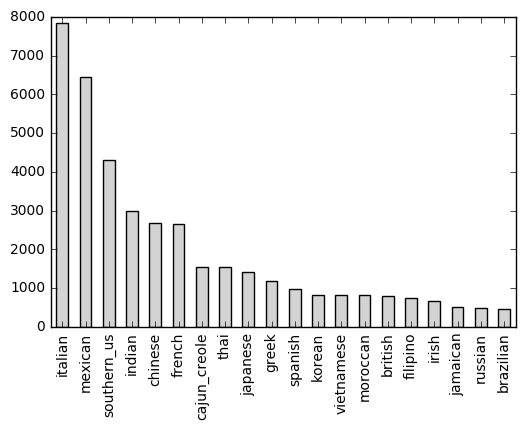

In [5]:
cuisines_vc.plot(kind='bar', color='lightgrey')

# Ingredients (entire data set)

In [6]:
# Ingredients list sorted alphabetically
for key, value in sorted(Counter(ingredients).items()):
    print key, value

(    oz.) tomato sauce 11
(   oz.) tomato paste 9
(10 oz.) frozen chopped spinach 3
(10 oz.) frozen chopped spinach, thawed and squeezed dry 2
(14 oz.) sweetened condensed milk 2
(14.5 oz.) diced tomatoes 3
(15 oz.) refried beans 3
1% low-fat buttermilk 4
1% low-fat chocolate milk 2
1% low-fat cottage cheese 12
1% low-fat milk 193
2 1/2 to 3 lb. chicken, cut into serving pieces 2
2% low fat cheddar chees 1
2% low-fat cottage cheese 6
2% lowfat greek yogurt 2
2% milk shredded mozzarella cheese 1
2% reduced-fat milk 71
25% less sodium chicken broth 3
33% less sodium cooked deli ham 1
33% less sodium cooked ham 1
33% less sodium ham 3
33% less sodium smoked fully cooked ham 1
40% less sodium taco seasoning 7
40% less sodium taco seasoning mix 5
7 Up 4
8 ounc ziti pasta, cook and drain 1
95% lean ground beef 4
A Taste of Thai Rice Noodles 1
Accent Seasoning 6
Adobo All Purpose Seasoning 1
Alaskan king crab legs 2
Alexia Waffle Fries 1
Alfredo sauce 48
Amarena cherries 1
Amaretti Cookies 11

In [7]:
# Ingredients list sorted by frequency
ingredients_vc = pd.Series(ingredients).str.encode('utf-8', errors='strict').value_counts()
ingredients_vc

salt                                                      18049
onions                                                     7972
olive oil                                                  7972
water                                                      7457
garlic                                                     7380
sugar                                                      6434
garlic cloves                                              6237
butter                                                     4848
ground black pepper                                        4785
all-purpose flour                                          4632
pepper                                                     4438
vegetable oil                                              4385
eggs                                                       3388
soy sauce                                                  3296
kosher salt                                                3113
green onions                            

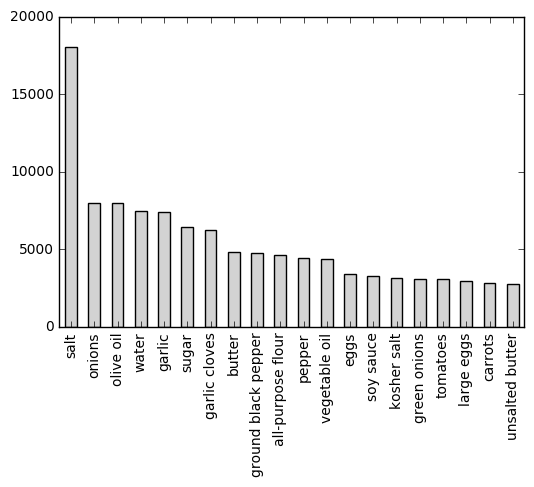

In [8]:
ingredients_vc.head(20).plot(kind='bar', color='lightgrey')
#ingredients_vc.tail(20).plot(kind='bar', color='lightgrey')

# Cusines by Ingredients¶

In [9]:
train_df = pd.read_json("train.json")

In [10]:
train_df.cuisine.unique()

array([u'greek', u'southern_us', u'filipino', u'indian', u'jamaican',
       u'spanish', u'italian', u'mexican', u'chinese', u'british', u'thai',
       u'vietnamese', u'cajun_creole', u'brazilian', u'french',
       u'japanese', u'irish', u'korean', u'moroccan', u'russian'], dtype=object)

In [11]:
cuisines = [u'greek', u'southern_us', u'filipino', u'indian', u'jamaican',
       u'spanish', u'italian', u'mexican', u'chinese', u'british', u'thai',
       u'vietnamese', u'cajun_creole', u'brazilian', u'french',
       u'japanese', u'irish', u'korean', u'moroccan', u'russian']

In [12]:
ingredient_dict = {}
for cuisine in cuisines:
    ingredient_dict[cuisine] = Counter(",".join(
            [",".join(_) for _ in train_df[train_df.cuisine == cuisine]['ingredients'].values]).split(","))

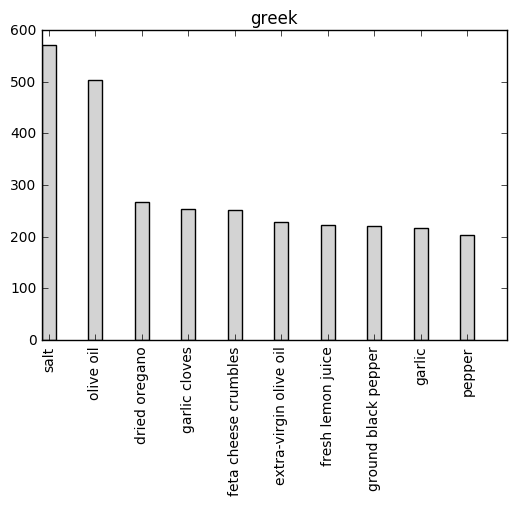

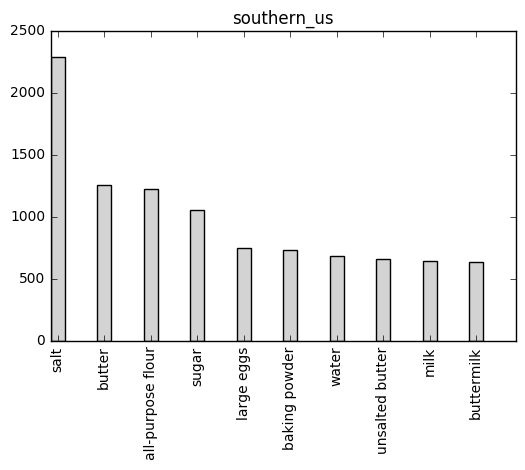

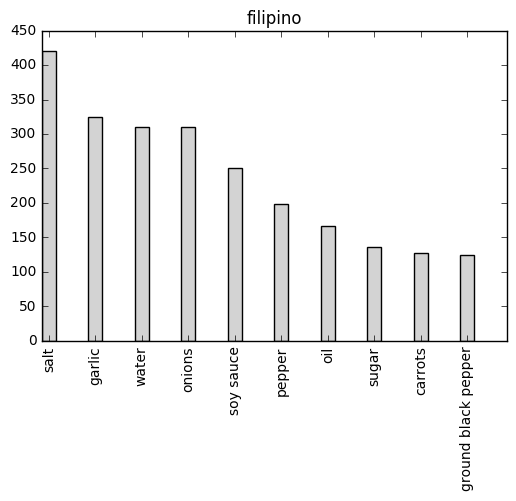

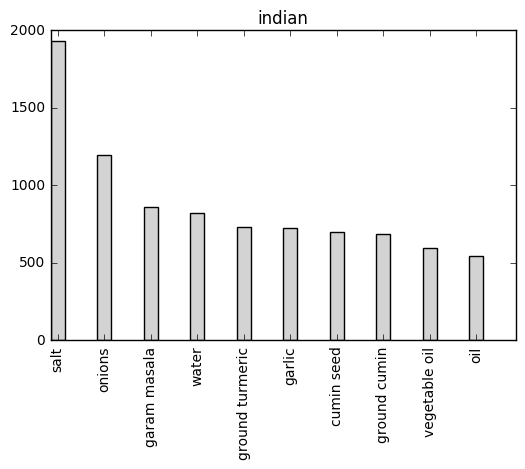

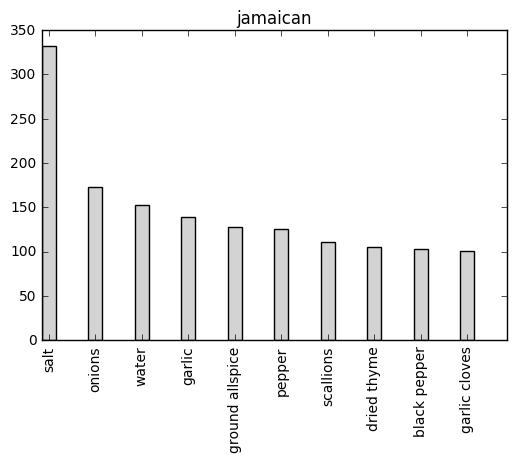

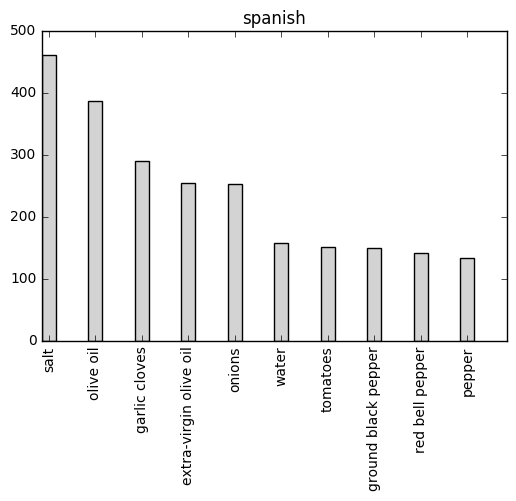

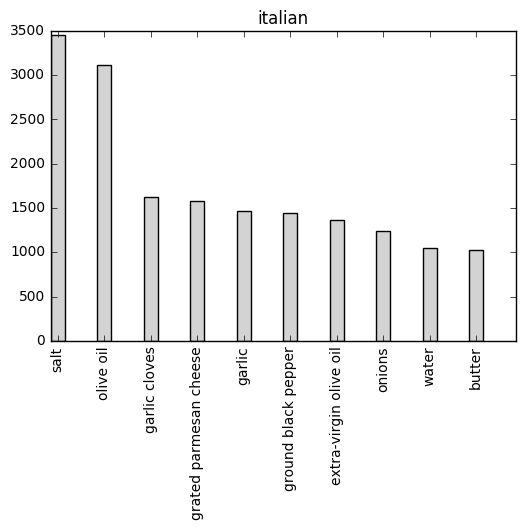

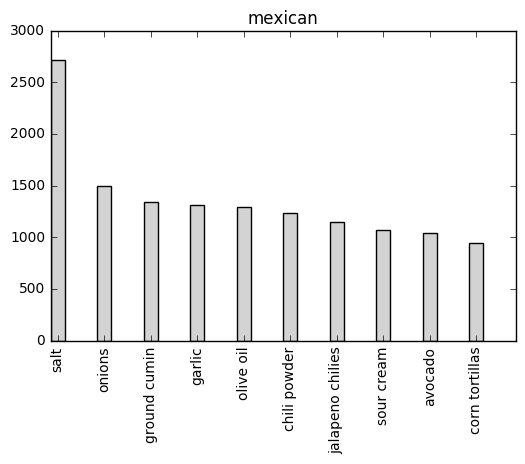

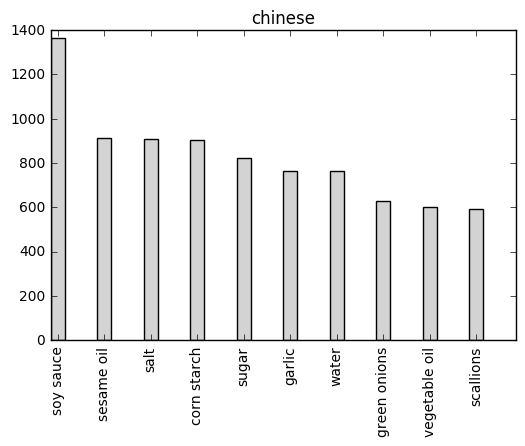

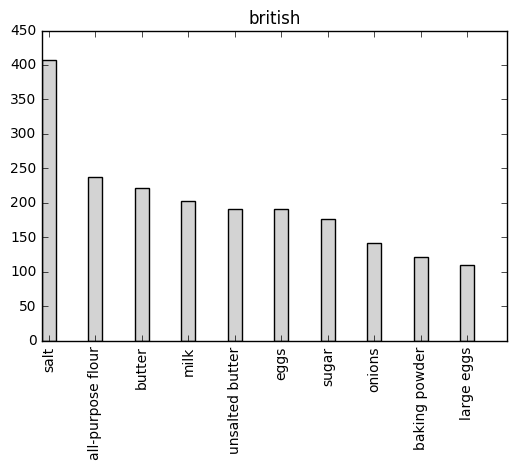

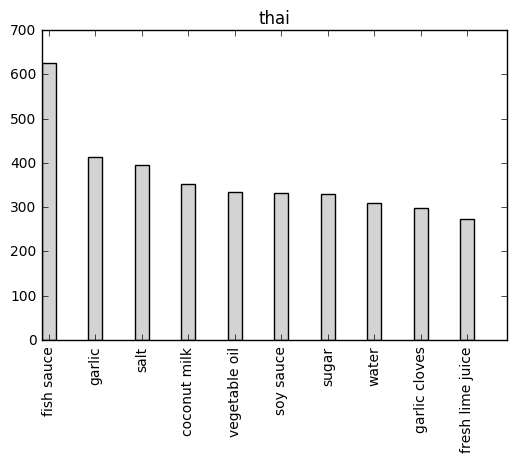

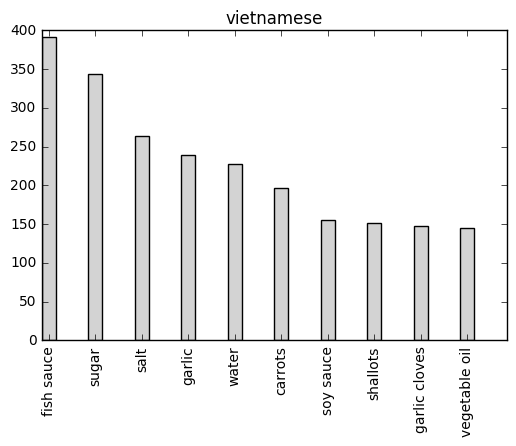

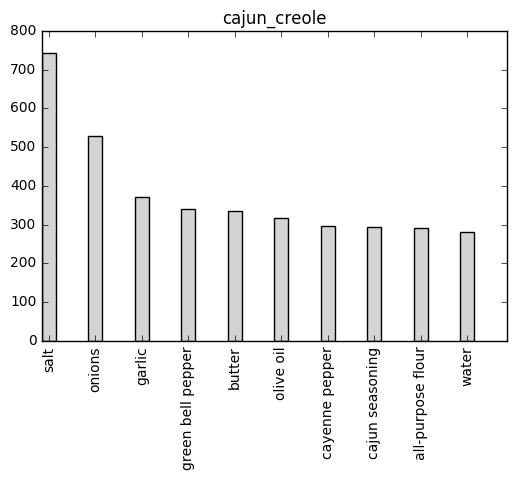

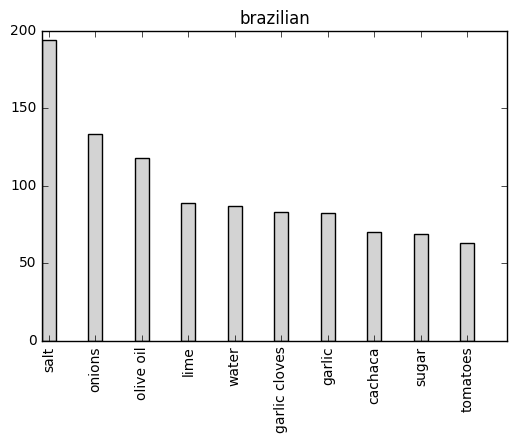

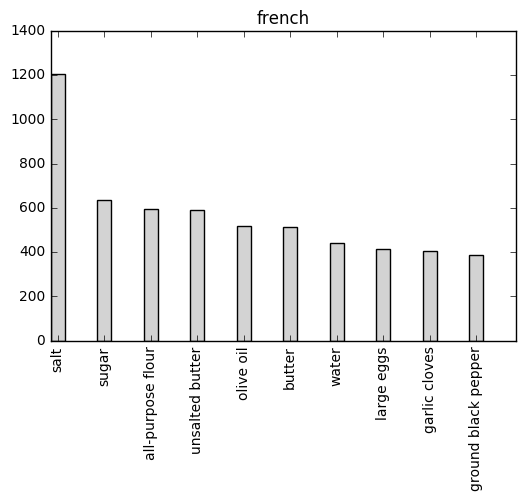

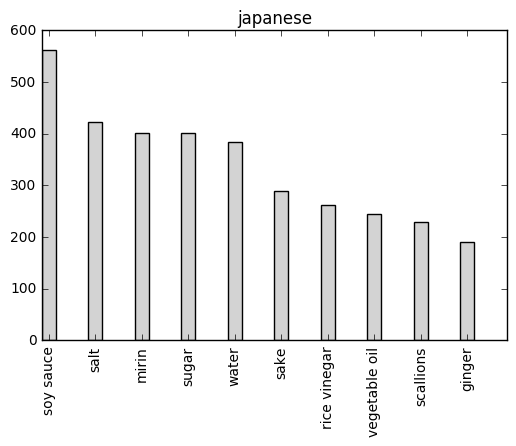

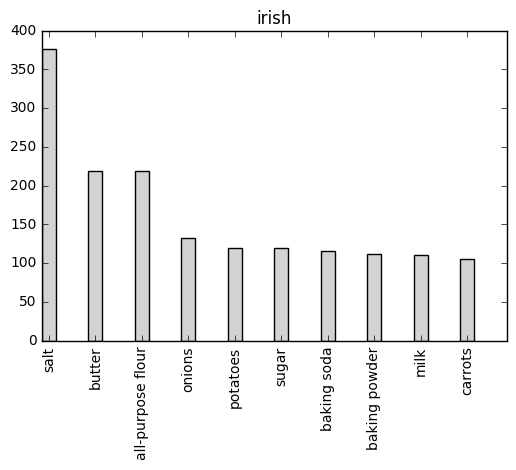

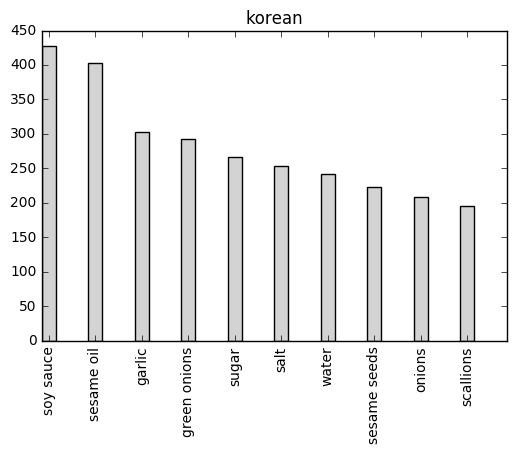

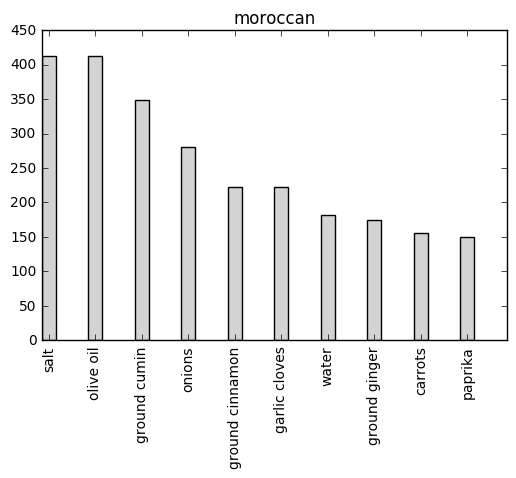

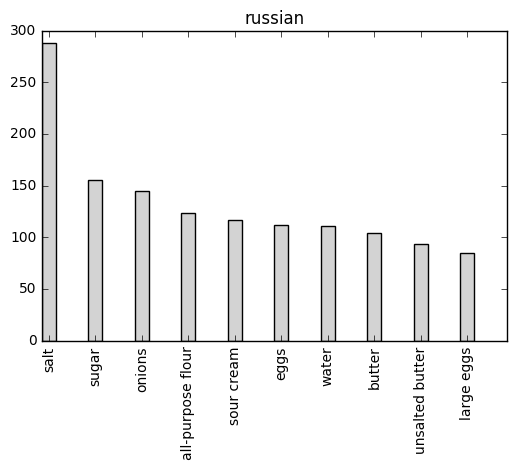

In [13]:
width = 0.3
for cuisine in cuisines:
    labels, values =  zip(*ingredient_dict[cuisine].most_common(10))
    indexes = np.arange(len(labels))
    plt.bar(indexes, values, width, color='lightgrey', )
    plt.xticks(indexes + width/2., labels, rotation='vertical')
    plt.title(cuisine)
    plt.show()

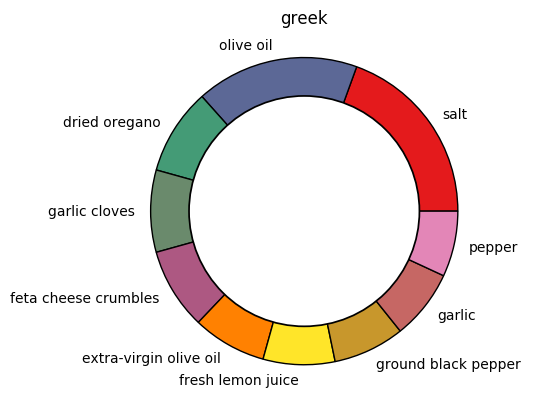

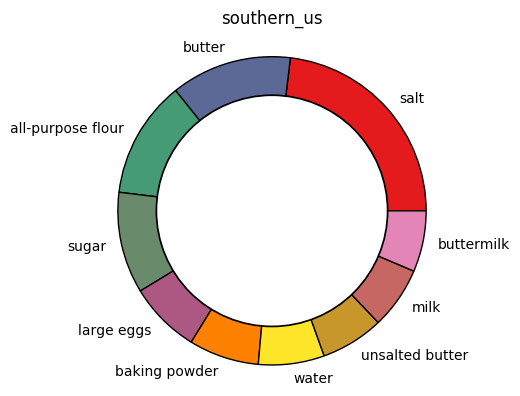

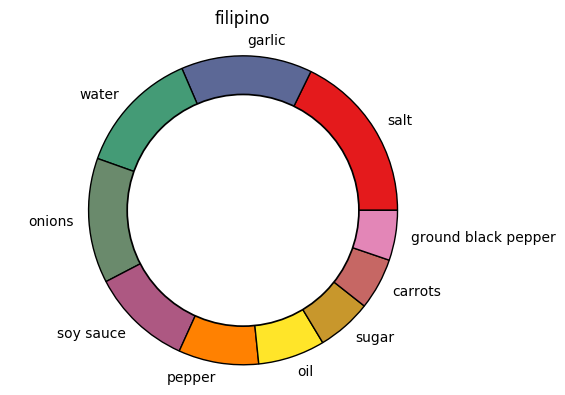

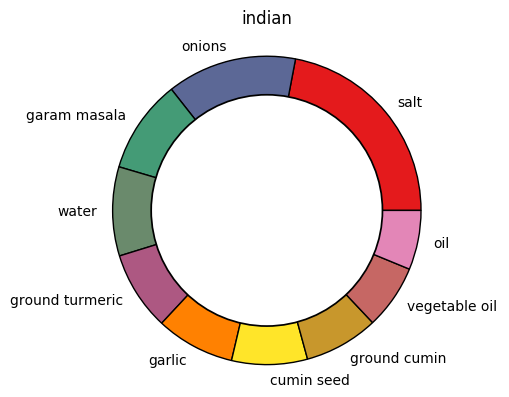

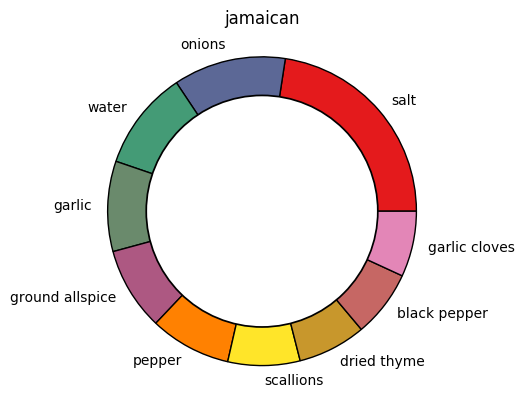

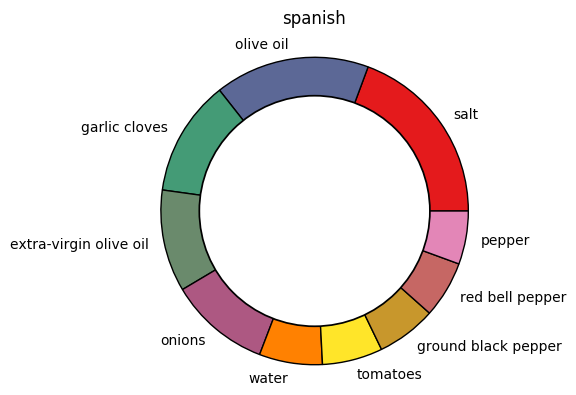

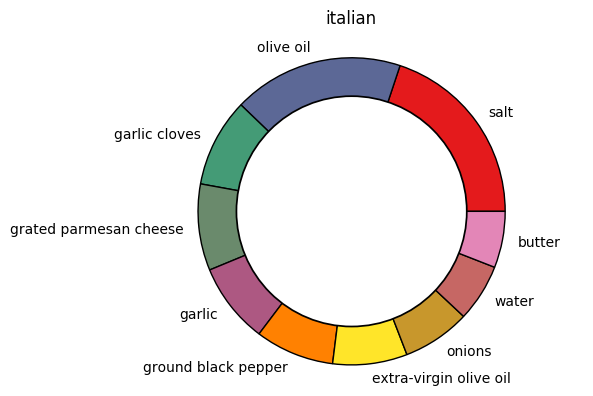

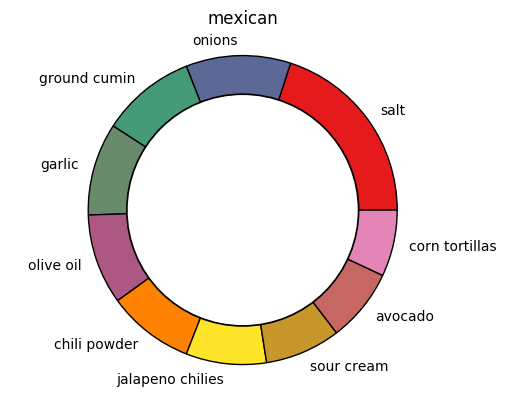

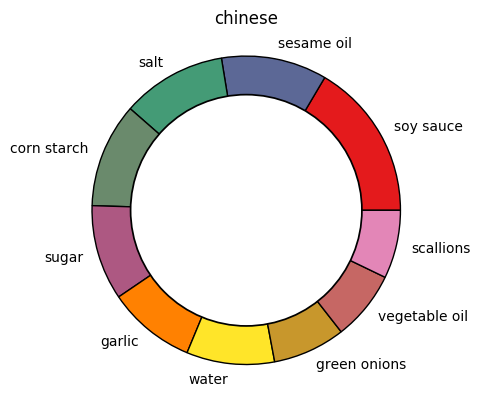

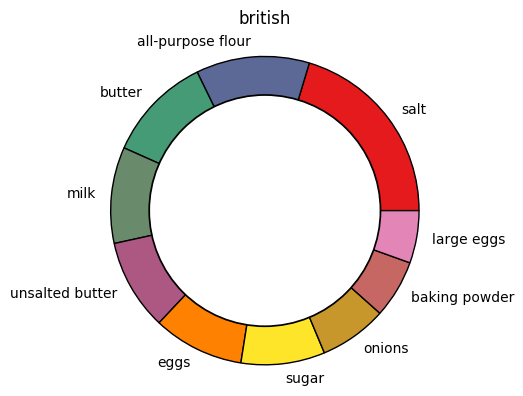

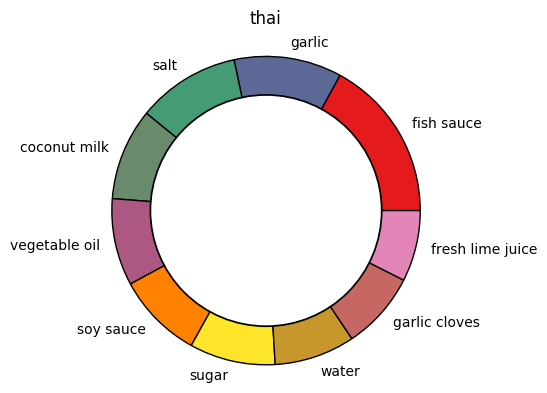

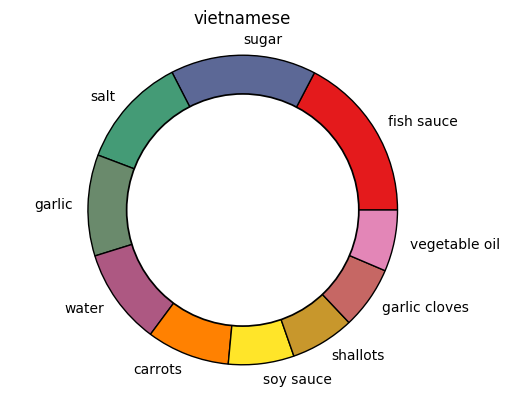

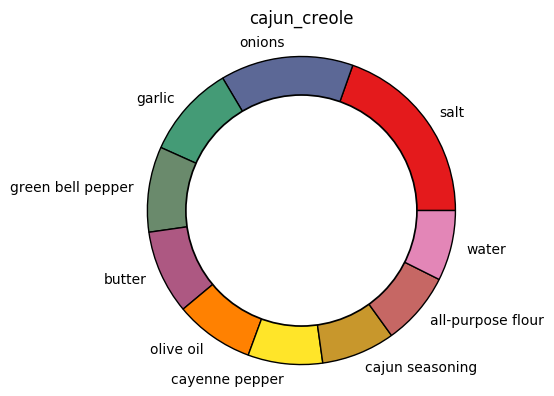

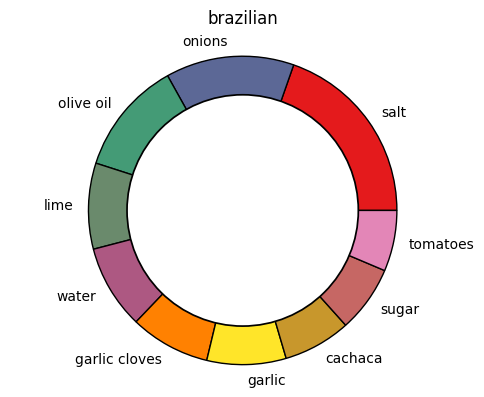

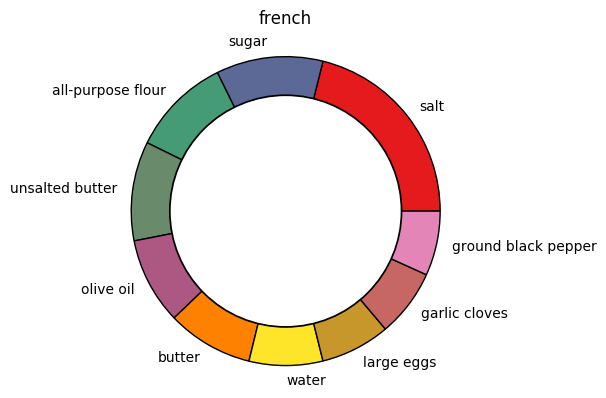

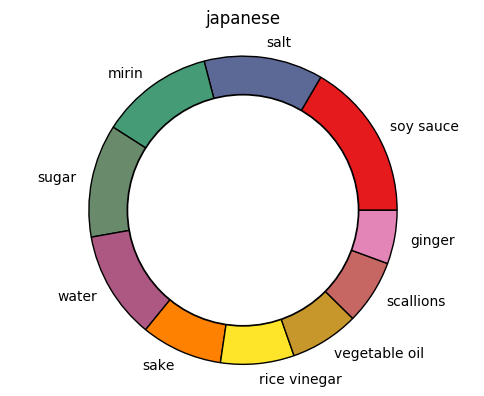

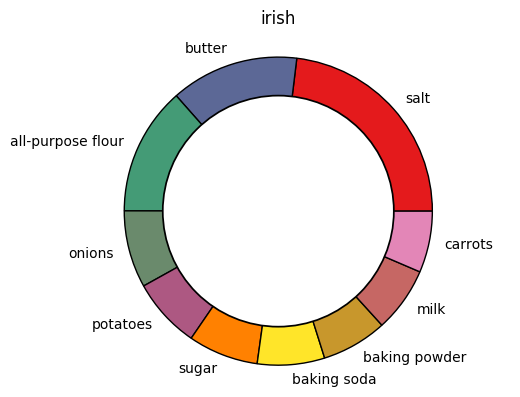

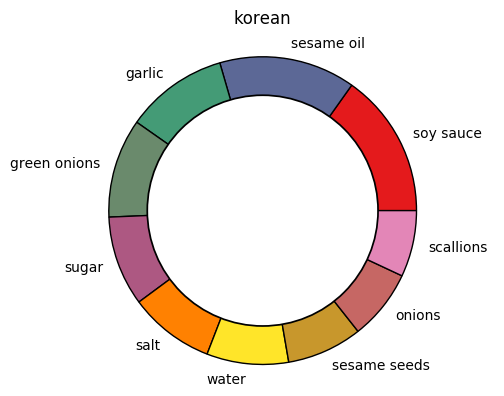

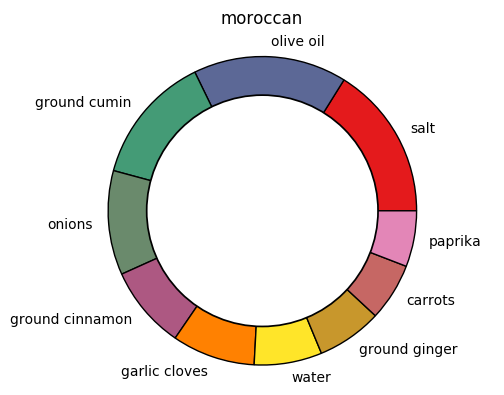

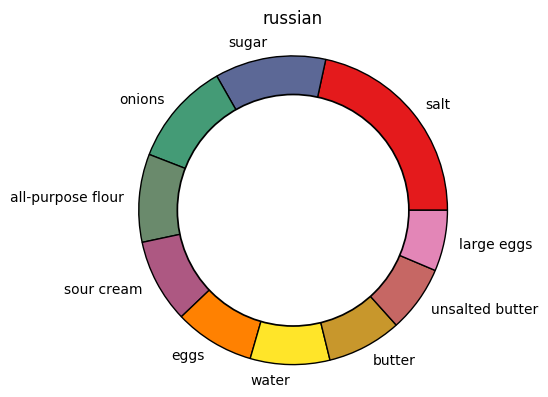

In [14]:
from matplotlib import cm

np.random.seed(0)
a=np.random.random(10)
cs=cm.Set1(np.arange(10)/10.)

for cuisine in cuisines:
    labels, values =  zip(*ingredient_dict[cuisine].most_common(10))
    #print labels, values
    plt.pie(values, labels=labels, shadow=False, colors=cs)
        
    centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.title(cuisine, y=1.08)
    plt.show()  